# import df

In [ ]:
import io
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Import các file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce retail.xlsx to ecommerce retail.xlsx


# Chuẩn bị data

In [ ]:
file_path = 'ecommerce retail.xlsx'
data = pd.read_excel(file_path)

In [ ]:
#segmentation_df = pd.read_excel(file_path, sheet_name='Segmentation')

In [ ]:
data = data.dropna(subset=['CustomerID'])
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

<ipython-input-6-22c48e87a369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


# Check missing data

In [ ]:
missing_data_ecommerceretail = data.isnull().sum()
print("Missing data in ecommerce_retail:\n", missing_data_ecommerceretail)


Missing data in ecommerce_retail:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


# Check duplicate

In [ ]:
duplicate_ecommerceretail = data.duplicated().sum()
print("Duplicate in ecommerce_retail:", duplicate_ecommerceretail)

Duplicate in ecommerce_retail: 5225


# Check incorrect data types

In [ ]:
datatype_ecommerceretail = data.dtypes
print("Data types in ecommerce_retail:\n", datatype_ecommerceretail)

Data types in ecommerce_retail:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object


# Summarize numerical data

In [ ]:
summarize_ecommerceretail = data.describe()
print("Summarize ecommerce_retail:\n", summarize_ecommerceretail)

Summarize ecommerce_retail:
             Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID     TotalPrice  
count  406829.000000  406829.000000  
mean    15287.690570      20.401854  
min     12346.000000 -168469.600000  
25%     13953.000000       4.200000  
50%     15152.000000      11.100000  
75%     16791.000000      19.500000  
max     18287.000000  168469.600000  
std      1713.600303     427.591718 

# Tính RFM

In [ ]:
reference_date = dt.datetime(2011, 12, 10)

rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'                                        #
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

# Phân tích RFM


In [ ]:

rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)
print(rfm_data.head())

   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0     12346.0      325          2      0.00       1       2       1       121
1     12347.0        2          7   4310.00       5       4       5       545
2     12348.0       75          4   1797.24       2       3       4       234
3     12349.0       18          1   1757.55       4       1       4       414
4     12350.0      310          1    334.40       1       1       2       112


# Loại bỏ khoảng trống và check unique

Đoạn này em bị fail khi check và merge với sheet Segmentation, Coach check và hướng dẫn em cách sửa với ạ

In [ ]:
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].str.split(',')
rfm_data = rfm_data.explode('RFM_Score').reset_index(drop=True)
print(rfm_data.head())

NameError: name 'rfm_data' is not defined

In [ ]:
 rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype(str).str.strip()
segmentation_df['RFM Score'] = segmentation_df['RFM Score'].astype(str).str.strip()

In [ ]:
print(rfm_data['RFM_Score'].unique())
print(segmentation_df['RFM Score'].unique())

['121' '545' '234' '414' '112' '354' '111' '114' '435' '315' '524' '335'
 '555' '223' '534' '132' '511' '324' '334' '413' '532' '124' '215' '233'
 '445' '544' '144' '433' '122' '213' '412' '244' '455' '325' '314' '322'
 '214' '344' '355' '245' '133' '343' '313' '443' '554' '224' '113' '543'
 '312' '345' '243' '225' '425' '411' '221' '432' '321' '533' '513' '232'
 '125' '441' '422' '434' '211' '323' '521' '222' '311' '123' '421' '423'
 '135' '444' '143' '212' '512' '523' '424' '145' '522' '131' '535' '333'
 '142' '254' '332' '342' '242' '542' '255' '442' '231' '541' '155' '454'
 '235' '115' '241' '453' '134' '253' '331' '141' '154' '525' '553' '353'
 '531' '431' '552' '152' '515' '252' '153' '251' '341' '551']
['555, 554, 544, 545, 454, 455, 445'
 '543, 444, 435, 355, 354, 345, 344, 335'
 '553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323'
 '512, 511, 422, 421, 412, 411, 311'
 '525, 524, 523, 522, 521, 515, 514, 513, 4

# merge với segmentation và cho ra kết quả

Đoạn này em bị fail khi check và merge với sheet Segmentation, Coach check và hướng dẫn em cách sửa với ạ

In [ ]:
rfm_data_merge = pd.merge(rfm_data, segmentation_df, on='RFM Score', how='left', suffixes=('_rfm', '_seg'))
print(rfm_data_merge.head())

   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0     12346.0      325          2      0.00       1       2       1       121   
1     12347.0        2          7   4310.00       5       4       5       545   
2     12348.0       75          4   1797.24       2       3       4       234   
3     12349.0       18          1   1757.55       4       1       4       414   
4     12350.0      310          1    334.40       1       1       2       112   

  RFM Score Segment_x Segment_y Segment_rfm Segment_seg  
0       121       NaN       NaN         NaN         NaN  
1       545       NaN       NaN         NaN         NaN  
2       234       NaN       NaN         NaN         NaN  
3       414       NaN       NaN         NaN         NaN  
4       112       NaN       NaN         NaN         NaN  


In [ ]:
def get_customer_segment(rfm_score):

    score = str(rfm_score)


    if score in ['555', '554', '544', '545', '454', '455', '445']:
        return "Champions"
    elif score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return "Loyal"
    elif score in ['553', '551', '552', '541', '542', '533', '532', '531',
                   '452', '451', '442', '441', '431', '453', '433', '423',
                   '353', '352', '351', '342', '341', '333', '323']:
        return "Potential Loyalist"
    elif score in ['512', '511', '422', '421', '412', '411', '311']:
        return "New Customers"
    elif score in ['525', '524', '523', '522', '521', '515', '514', '513',
                   '425', '424', '413', '414', '415', '315', '314', '313']:
        return "Promising"
    elif score in ['535', '534', '443', '434', '343', '344', '325', '324']:
        return "Need Attention"
    elif score in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return "About To Sleep"
    elif score in ['255', '254', '245', '244', '253', '252', '243', '242',
                   '235', '234', '225', '224', '153', '152', '145', '143',
                   '142', '135', '134', '133', '125', '124']:
        return "At Risk"
    elif score in ['155', '154', '144', '214', '215', '115', '114', '113']:
        return "Cannot Lose Them"
    elif score in ['332', '322', '233', '232', '223', '222', '132', '123',
                   '122', '212', '211']:
        return "Hibernating customers"
    elif score in ['111', '112', '121', '131', '141', '151']:
        return "Lost customers"
    else:
        return "Unknown Segment"




In [ ]:
rfm_data['Segment'] = rfm_data['RFM_Score'].apply(get_customer_segment)
print(rfm_data.head())

   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score  \
0     12346.0      325          2      0.00       1       2       1       121   
1     12347.0        2          7   4310.00       5       4       5       545   
2     12348.0       75          4   1797.24       2       3       4       234   
3     12349.0       18          1   1757.55       4       1       4       414   
4     12350.0      310          1    334.40       1       1       2       112   

        Segment_x         Segment  
0  Lost customers  Lost customers  
1       Champions       Champions  
2         At Risk         At Risk  
3       Promising       Promising  
4  Lost customers  Lost customers  


# 2 Visualize


# đếm số lượng

In [ ]:
segment_counts = rfm_data['Segment'].value_counts()
print(segment_counts)

Segment
Champions                865
Hibernating customers    714
Lost customers           488
Loyal                    432
At Risk                  405
Potential Loyalist       378
About To Sleep           277
New Customers            269
Need Attention           219
Promising                137
Cannot Lose Them          98
Unknown Segment           90
Name: count, dtype: int64


# vẽ biểu đồ cột


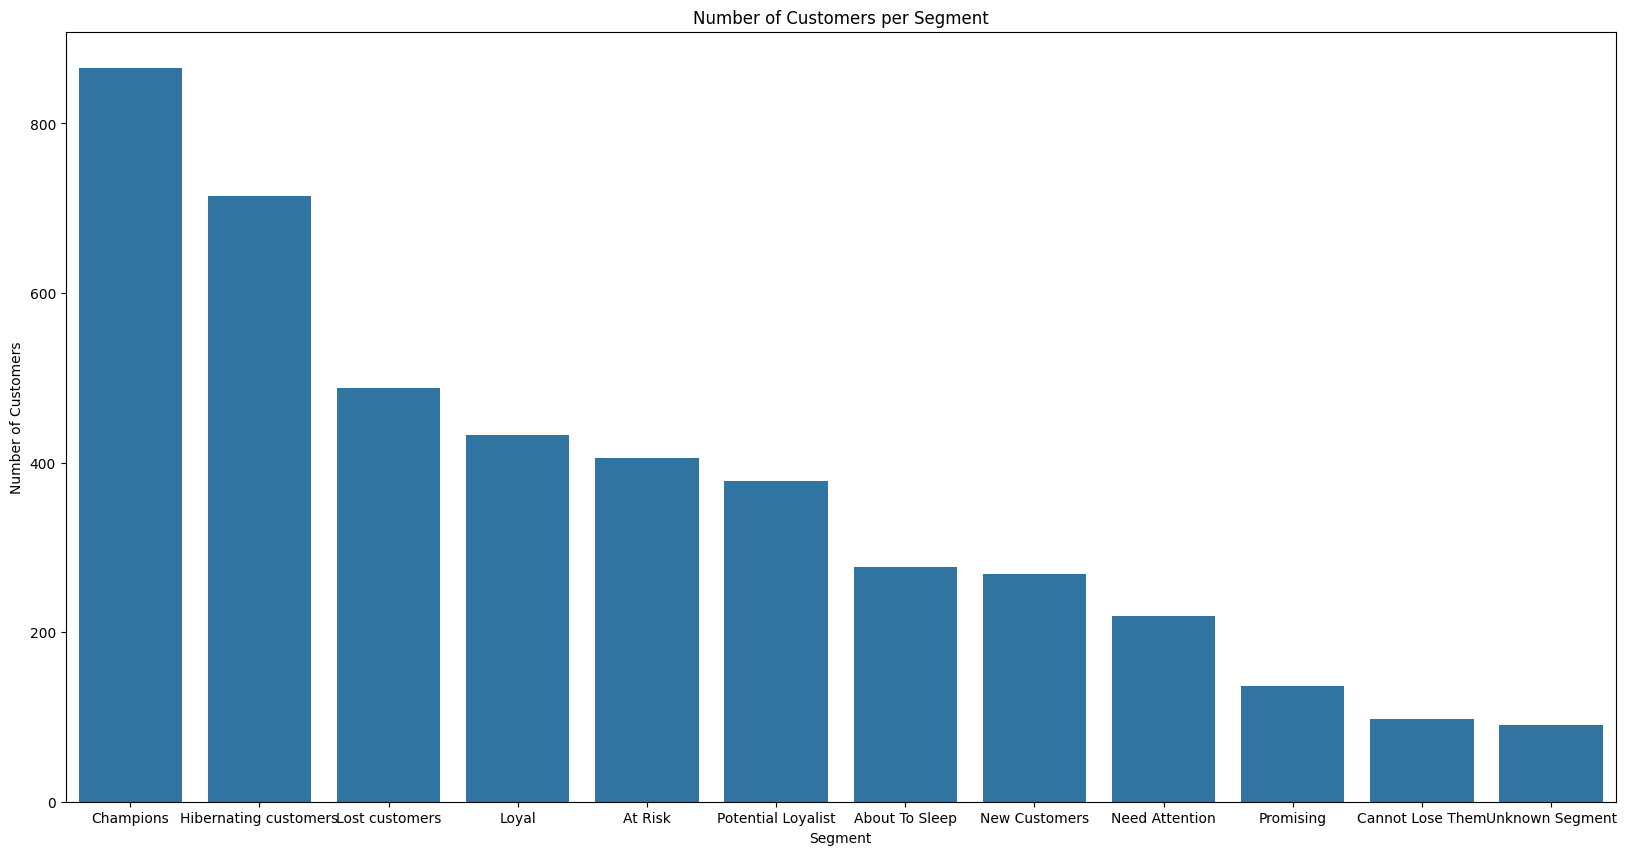

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Number of Customers per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Vẽ biểu đồ tròn

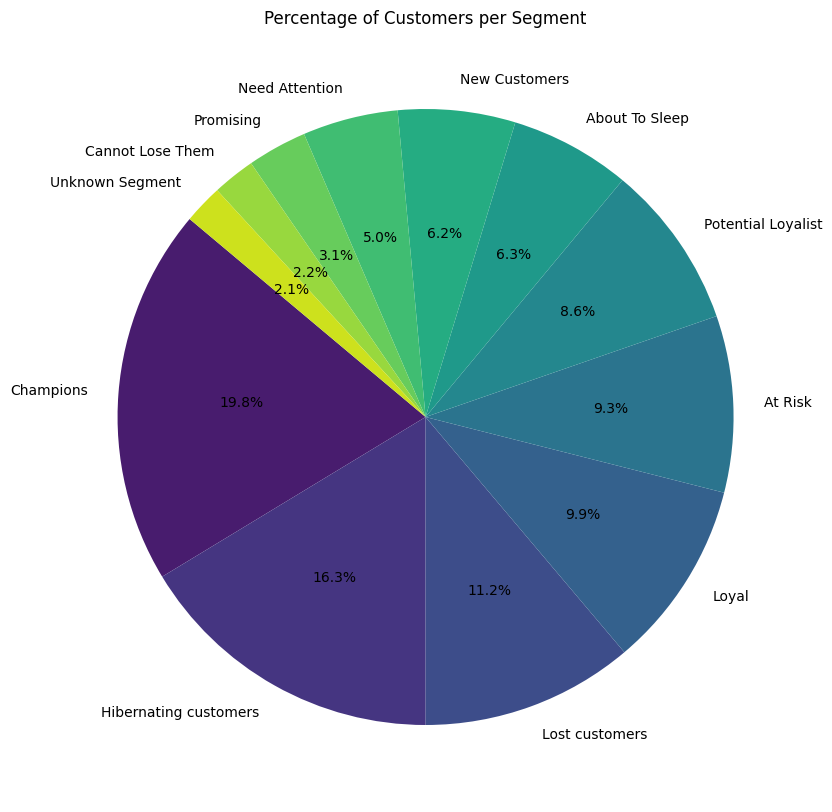

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(segment_counts)))
plt.title('Percentage of Customers per Segment')
plt.show()

# Phân tích hiện trạng

1. Nhóm khách hàng 'Champions'
- Là nhóm khách hàng cao cấp nhất, cũng chiếm tỉ lệ nhiều nhất lên đến 19,8%.
- Nhóm khách hàng này hội tụ đủ các yếu tố như thời gian mua hàng, tần suất mua hàng cũng như giá trị đơn hàng lớn
- Nhóm khách hàng này có thể được xem như nguồn doanh thu lớn nhất của công ty
- Nên được giữ vững

2. Nhóm At risk và need attention
- Nhóm này còn chiếm số lượng khá thấp
- Để đánh giá thì họ có tiềm năng trở thành khách hàng thân thiết, hoặc khách hàng ngừng mua sắm
- Nhóm khách hàng này cần một cái gì đó từ phía cửa hàng như chương trình khuyến mãi, sale sốc, sản phẩm phù hợp với nhu cầu của họ nhiều hơn
- Cần đánh đúng tâm lý mua hàng của nhóm này mới có thể kích cầu mua sắm từ họ


3. Nhóm new customer và potential loyalist

- Nhóm khách hàng mới và trung thành tiềm năng này chiếm 1 phần kha khá
- Có tiềm năng trở thành khách hàng champions
- Cần tăng cường các chiến dịch khuyến mãi, sale sốc
- Tăng cường chăm sóc
- Từ đó thúc đẩy họ thành các khách hàng trung thành hoặc Champions

# Nên tập trung vào chỉ số nào trong 3 chỉ số R, F, M

- Team Marketing cần tập trung vào nhóm At risk và need attention. Nhóm này chiếm cũng kha khá, tuy nhiên rất dễ mất họ. Cần triển khai chương trình giảm giá nào đó, nhắm thẳng vào họ để kích cầu mua sắm

- Team Sale cần tập trung thẳng vào nhóm champions và loyal. Nhằm để kích cầu mua sắm từ 2 nhóm đó cần khuyến khích gia tăng giá trị đơn hàng đạt ngưỡng bao nhiêu sẽ nhận được ưu đãi từ chương trình hoặc những phần quà hấp dẫn.